# THE SPARKS FOUNDATION

# Data Science & Business Analytics Internship GRIP Feb 2021

# Author : Udita Goswami

# Task 7 : Stock Market Prediction using Numerical and Textual Analysis 

In [ ]:
Objective: Create a hybrid model for stock price/performance 
    prediction using numerical analysis of historical stock prices, and 
    sentimental analysis of news headlines

In [1]:
## Import required library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_style('darkgrid')
from __future__ import division
from datetime import datetime

In [2]:
## Import the dataset, as we know pandas cannot identify the date and time format 
## so we also convert them to date and time format
stock_data = pd.read_csv('S&P 500 Stock prices.csv',header=0,parse_dates=[0],squeeze=True)
stock_data.head()

,Date,Close,Adj Close
0,1991-01-04,371.30,371.30
1,1991-02-04,379.50,379.50
2,1991-03-04,378.94,378.94
3,1991-04-04,379.77,379.77
4,1991-05-04,375.36,375.36


In [3]:
stock_data = pd.read_csv('S&P 500 Stock prices.csv',header=0)
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.head()

,Date,Close,Adj Close
0,1991-01-04,371.30,371.30
1,1991-02-04,379.50,379.50
2,1991-03-04,378.94,378.94
3,1991-04-04,379.77,379.77
4,1991-05-04,375.36,375.36


In [4]:
## as we know in time anlysis we take date as Index value
stock_data.index = stock_data['Date']

In [5]:
## Final Data look Like after sortingg
stock_data.sort_index(inplace=True)
stock_data

,Date,Close,Adj Close
Date,,,
1991-01-04,1991-01-04,371.30,371.30
1991-01-05,1991-01-05,380.29,380.29
1991-01-07,1991-01-07,377.92,377.92
1991-01-08,1991-01-08,387.12,387.12
1991-01-10,1991-01-10,389.20,389.20
...,...,...,...
2021-11-02,2021-11-02,3916.38,3916.38
2021-11-03,2021-11-03,3939.34,3939.34
2021-12-01,2021-12-01,3801.19,3801.19


In [6]:
## you can see here that know our date is converted in to date and time format earlier it read as String
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7558 entries, 1991-01-04 to 2021-12-03
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7558 non-null   datetime64[ns]
 1   Close      7558 non-null   float64       
 2   Adj Close  7558 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 236.2 KB


In [7]:
stock_data.describe()

,Close,Adj Close
count,7558.000000,7558.000000
mean,1391.270658,1391.270658
std,765.011493,765.011493
min,368.570000,368.570000
25%,909.610000,909.610000
50%,1240.210000,1240.210000
75%,1697.465000,1697.465000
max,3974.540000,3974.540000


#### Lets see the trend line of the data

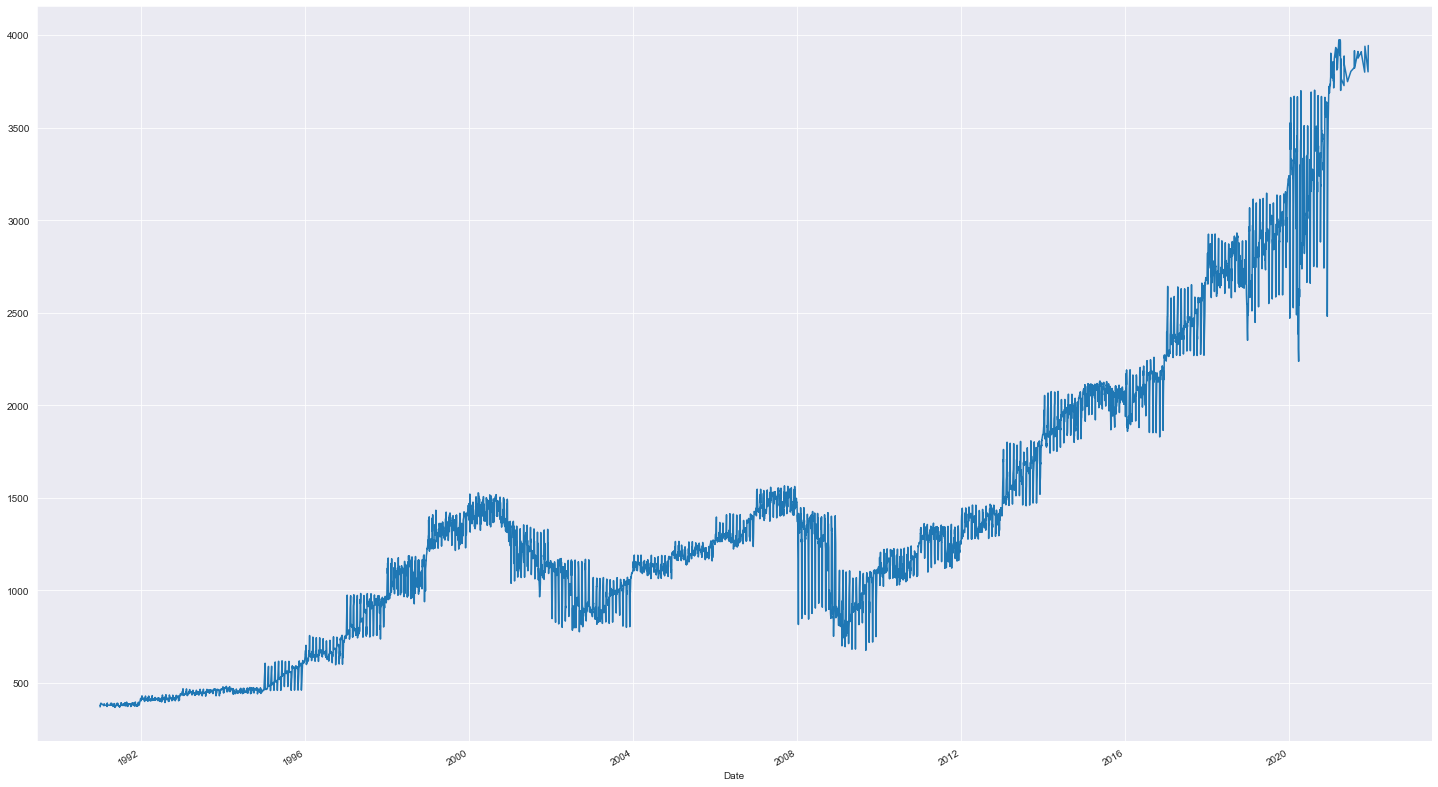

In [8]:
stock_data['Close'].plot(figsize=(25, 15))

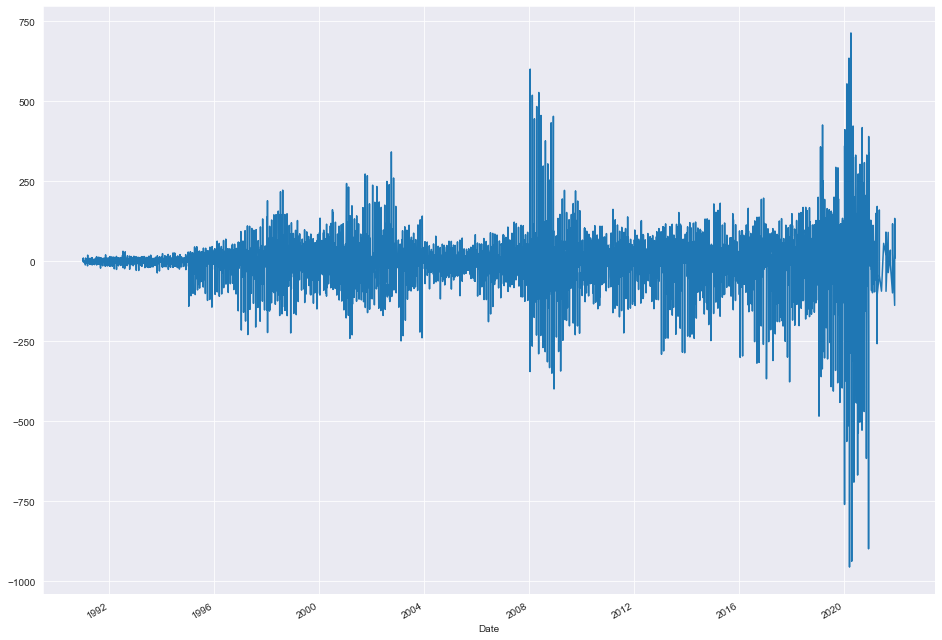

In [9]:
## This is a problem for time series analysis though as non-stationary data is hard to reason about. 
## The first thing we can try is a first difference of the series. 
## In other words, subtract the previous value t-1 from the current value t to get the difference d(t).

stock_data['First Difference'] = stock_data['Close'] - stock_data['Close'].shift()
stock_data['First Difference'].plot(figsize=(16, 12))

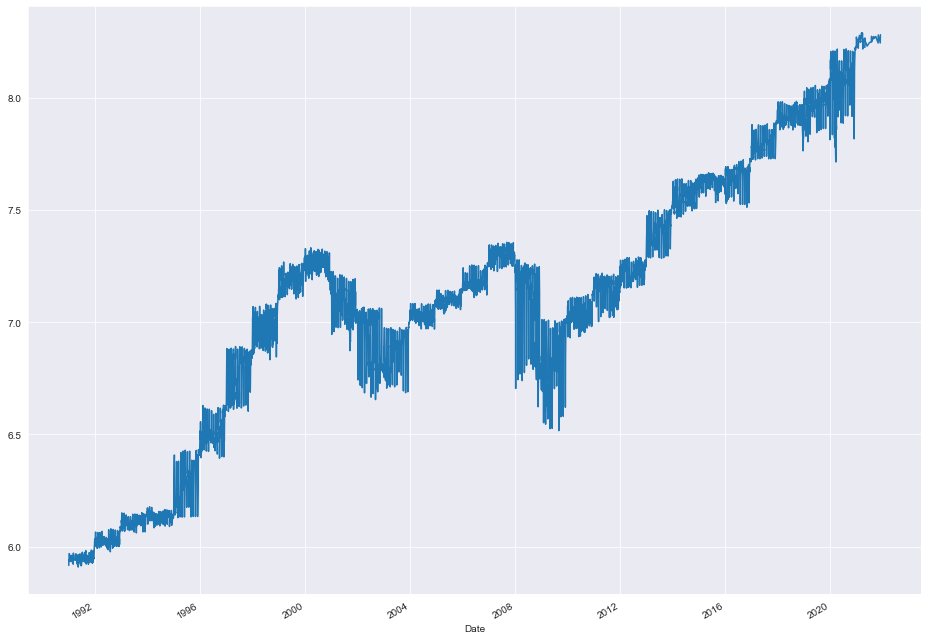

In [10]:

## The data no longer appears to be trending up over time and is instead centered around 0. 
## There’s another problem though. Look at the variance. It’s very small early on and steadily increases over time. 
## This is a sign that the data is not only non-stationary but also exponentially increasing. 
## The magnitude of the day-to-day variations at present day completely dwarf the magnitude of the changes in 1950. 
## To deal with this, we’ll apply a log transform to the original series.

stock_data['Natural Log'] = stock_data['Close'].apply(lambda x: np.log(x))
stock_data['Natural Log'].plot(figsize=(16, 12))

In [11]:
## transforming the Close dataset into a moving average with a window size of 2 days, chosen arbitraril

stock_data['Roll_mean']= stock_data['Close'].rolling(window=2).mean()
stock_data['Roll_max']= stock_data['Close'].rolling(window=2).max()
stock_data

,Date,Close,Adj Close,First Difference,Natural Log,Roll_mean,Roll_max
Date,,,,,,,
1991-01-04,1991-01-04,371.30,371.30,NaN,5.917010,NaN,NaN
1991-01-05,1991-01-05,380.29,380.29,8.99,5.940934,375.795,380.29
1991-01-07,1991-01-07,377.92,377.92,-2.37,5.934683,379.105,380.29
1991-01-08,1991-01-08,387.12,387.12,9.20,5.958735,382.520,387.12
1991-01-10,1991-01-10,389.20,389.20,2.08,5.964093,388.160,389.20
...,...,...,...,...,...,...,...
2021-11-02,2021-11-02,3916.38,3916.38,116.77,8.272923,3857.995,3916.38
2021-11-03,2021-11-03,3939.34,3939.34,22.96,8.278768,3927.860,3939.34
2021-12-01,2021-12-01,3801.19,3801.19,-138.15,8.243069,3870.265,3939.34


In [12]:
## Expanding window: Accumulating window over the values.
stock_data['Expand_max']= stock_data['Close'].expanding().max()
stock_data.head()

,Date,Close,Adj Close,First Difference,Natural Log,Roll_mean,Roll_max,Expand_max
Date,,,,,,,,
1991-01-04,1991-01-04,371.30,371.30,NaN,5.917010,NaN,NaN,371.30
1991-01-05,1991-01-05,380.29,380.29,8.99,5.940934,375.795,380.29,380.29
1991-01-07,1991-01-07,377.92,377.92,-2.37,5.934683,379.105,380.29,380.29
1991-01-08,1991-01-08,387.12,387.12,9.20,5.958735,382.520,387.12,387.12
1991-01-10,1991-01-10,389.20,389.20,2.08,5.964093,388.160,389.20,389.20


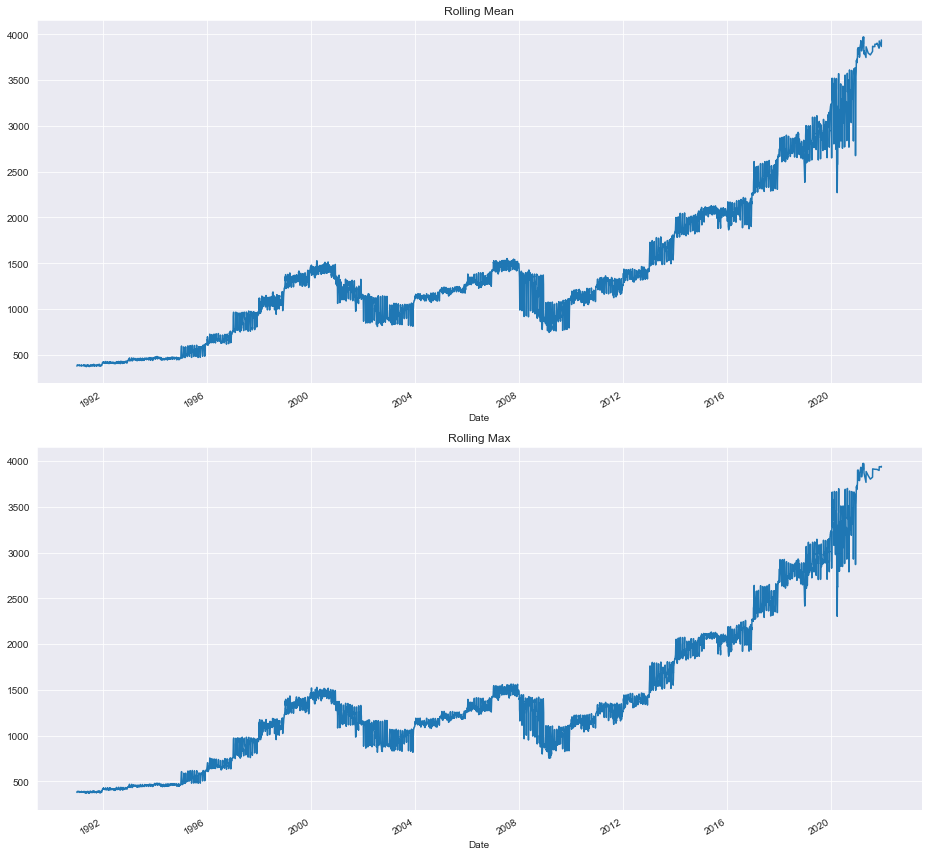

In [13]:
## here we plot the rolling max and Rolling mean graph
fig, ax = plt.subplots(2, 1, figsize=(13, 12))
stock_data['Roll_mean'].plot(ax=ax[0], title='Rolling Mean')
stock_data['Roll_max'].plot(ax=ax[1], title='Rolling Max')
fig.tight_layout()

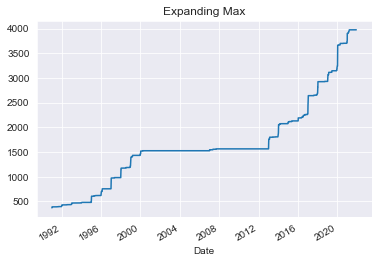

In [14]:
## here we can see the plot of the Expanding window Max
stock_data['Expand_max'].plot(title ='Expanding Max')

In [15]:
## interpolate() function is basically used to fill NA values in the dataframe or series.
#But, this is a very powerful function to fill the missing values

interpolate_stock_data=stock_data.interpolate(method='linear')

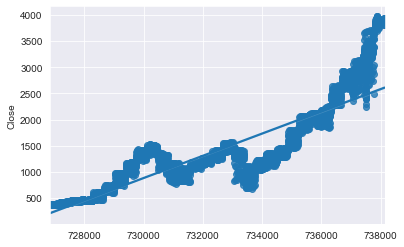

In [16]:
## here we draw the regression plot
import matplotlib.dates as mdates
sns.regplot(x=mdates.date2num(stock_data.index.values),y=stock_data.Close)

## Creating Lag plots

Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems.
Lag values are important part for forecasting the data

In [17]:
stock_data['lag1']= stock_data['Close'].shift(1)

In [18]:
stock_data.head(3)

,Date,Close,Adj Close,First Difference,Natural Log,Roll_mean,Roll_max,Expand_max,lag1
Date,,,,,,,,,
1991-01-04,1991-01-04,371.30,371.30,NaN,5.917010,NaN,NaN,371.30,NaN
1991-01-05,1991-01-05,380.29,380.29,8.99,5.940934,375.795,380.29,380.29,371.30
1991-01-07,1991-01-07,377.92,377.92,-2.37,5.934683,379.105,380.29,380.29,380.29


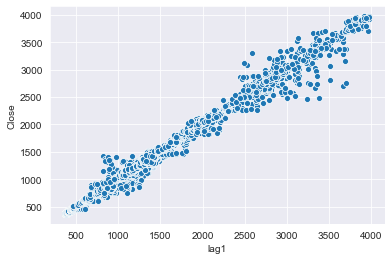

In [19]:
## scatter plot of Lag Dataset
sns.scatterplot(x=stock_data['lag1'],y= stock_data['Close'])

- here we can see that there are are corelation with the lag varibles and Close stock`m

In [20]:
from pandas.plotting import lag_plot

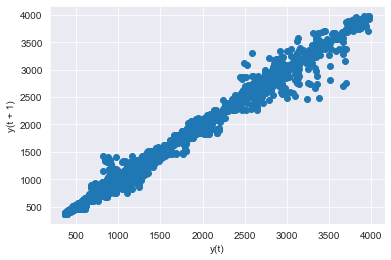

In [21]:
## Lag plot using Pandas library, here we also don't need to convert the lag data, we plot directly here
lag_plot(stock_data['Close'])

## AutoCorrelation Plots

In [22]:
from pandas.plotting import autocorrelation_plot

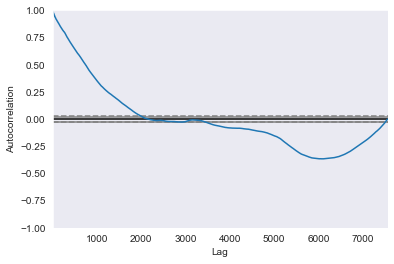

In [23]:
autocorrelation_plot(stock_data['Close'])

- this graph will show the Autocorrelation and Lag values
- here we can see that there very high corelation when the lag values are very high in the starting phase where the lag values are lower than 2000
- we can also see that somehow between 2000 and 3500 the autocorelation values are around zero.
- thereafter, as the lag values increases so the autocorelation become negtative from 5000 to 7000

## Decomposing Time series

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters

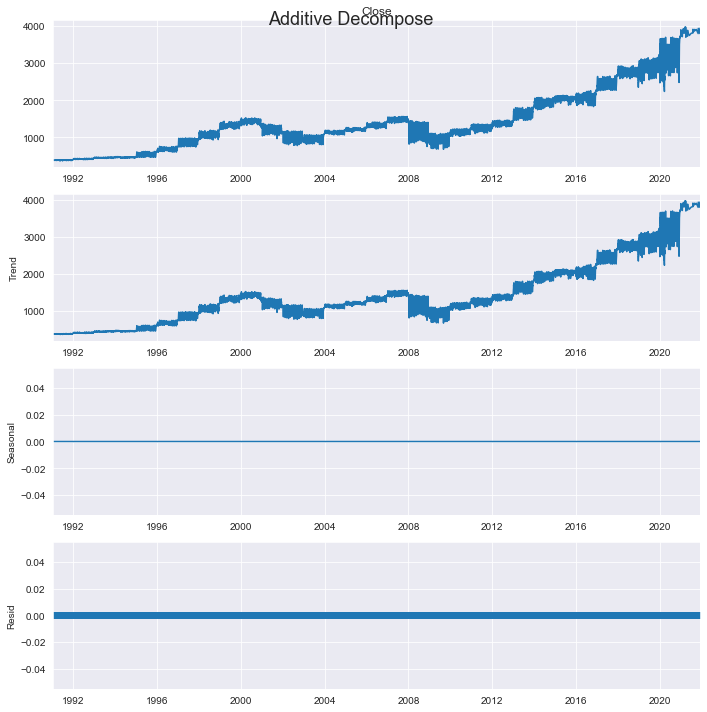

In [25]:
result = seasonal_decompose(x = stock_data['Close'],model='additive',extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

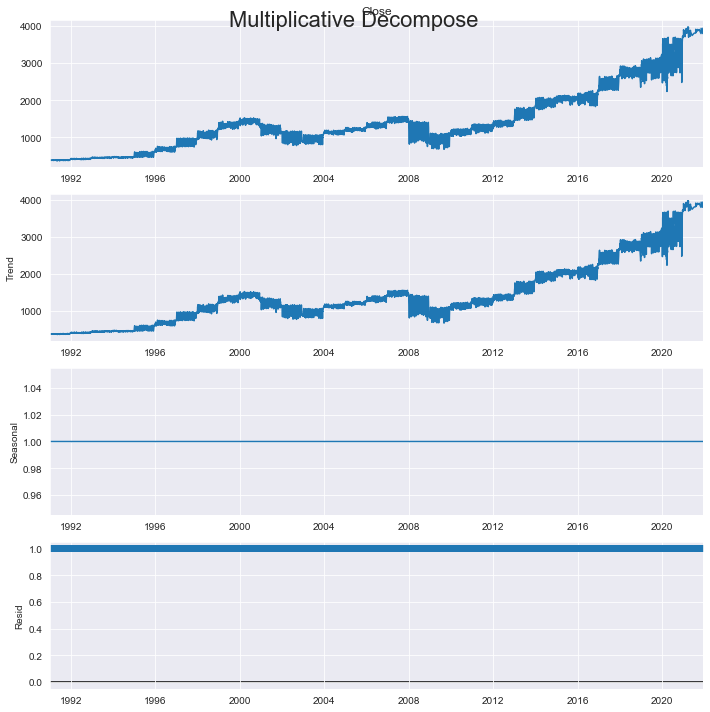

In [26]:
result = seasonal_decompose(x = stock_data['Close'],model='multiplicative',extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.show()

## Textual Analysis

In [27]:
# impot required library 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

In [28]:
news = pd.read_csv('india-news-headlines.csv')
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [29]:
news.shape

(3424067, 3)

Formatting and cleaning of data

In [30]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [31]:
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [32]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ MB


In [33]:
news['headline_category'].unique()

array(['unknown', 'entertainment.hindi.bollywood', 'india', ...,
       'elections.assembly-elections.bihar',
       'astrology.horoscope.monthly', 'astrology.numerology-tarot'],
      dtype=object)

In [34]:
news['headline_category'].value_counts().count()

1013

In [35]:
news['headline_text'].value_counts().count()

3168800

In [36]:
news.isnull().sum().sum()

0

In [37]:
#finding if any duplicate values are present
news.duplicated().sum()

24191

In [38]:
news.duplicated(keep=False).sum()

46130

In [39]:
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [40]:
news[news.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3421893,2020-12-27,city.nagpur,Govt forcing helpless sr citizens to fight leg...
3422119,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422120,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422956,2020-12-29,city.pune,PMC to draft separate DP after 23 villages' me...


In [41]:
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [42]:
#re-checking everything worked well with drop_duplicates() carried out earlier on the dataset
news.duplicated().sum()

0

In [43]:
from textblob import TextBlob

In [44]:
#getting a list of unique dates in publish_date column
lst = news['publish_date'].value_counts().index.tolist()

In [45]:
new = []
for x in lst:
    df = news.loc[news['publish_date'] == x]
    headlinetext = ''
    publishdate = str(x)
    headlinetext = df['headline_text'].iloc[0]
    for i in range(1 , len(df)):
        headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
    new.append(headlinetext)


In [46]:
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [47]:
newsdf

,publish_date,headline_text
0,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
1,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-11-01,Chetan Bhagat: Cleanliness begins at home. Gau...
...,...,...
7257,2001-03-16,Tape and Tell
7258,2001-03-17,Crouching Tiger; Hidden Dragon
7259,2001-06-05,Darkness Triumphs
7260,2001-04-01,Indians attacked by 'monkey man'


In [48]:
newsdf.head()

,publish_date,headline_text
0,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
1,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-11-01,Chetan Bhagat: Cleanliness begins at home. Gau...


We can calculate the sentiment using TextBlob. Based on the polarity, we determine whether it is a positive text or negative or neutral. For TextBlog, if the polarity is more than 0, it is considered positive, if it is less than 0 then it is considered negative and if it ia=s equal to 0 is considered neutral. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [49]:
#sorting the dataset based on dates
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)

In [50]:
#concatenating all the headline_text column values of same date in publish_date column
polarity = []
subjectivity = []
for idx, row in news.iterrows():
    polarity.append(TextBlob(row['headline_text']).sentiment[0])
    subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [52]:
newsdf.tail()

,publish_date,headline_text
7257,2020-12-27,Horoscope Today; 27 December 2020: Check astro...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Horoscope Today; 29 December 2020: Check astro...
7260,2020-12-30,Horoscope Today; 30 December 2020: Check astro...
7261,2020-12-31,Horoscope Today; 31 December 2020: Check astro...


In [55]:
#renameing the publish_date to date so it will help us during joining this dataset with bse_data dataset
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)
newsdf

,date
0,2001-01-02
1,2001-01-03
2,2001-01-04
3,2001-01-05
4,2001-01-06
...,...
7257,2020-12-27
7258,2020-12-28
7259,2020-12-29
7260,2020-12-30


### Thank You